<a href="https://colab.research.google.com/github/jtunde/Python/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install dask[dataframe]

In [40]:
%pip install "dask[complete]"

In [37]:
import dask
import dask.array as da
import dask.dataframe as dd
import dask.delayed as delayed
import numpy as np
import pandas as pd

In [39]:
from dask.distributed import Client

ImportError: ignored

In [ ]:
client = Client(processes=False)

In [12]:
def inc(num):
    return num + 1

In [13]:
def add(a, b):
    return a + b

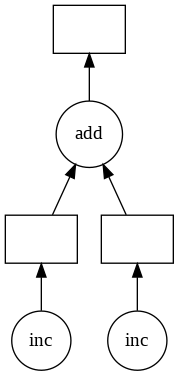

In [14]:
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x,y)
z.visualize()

In [8]:
x=da.random.random ((10000,10000))
z=x[::2,5000:].mean (axis=1)
%time z.compute()

CPU times: user 783 ms, sys: 39.5 ms, total: 823 ms
Wall time: 422 ms


array([0.49346372, 0.49817343, 0.50125265, ..., 0.50831316, 0.50651459,
       0.49655882])

CPU times: user 784 ms, sys: 2.83 ms, total: 787 ms
Wall time: 403 ms


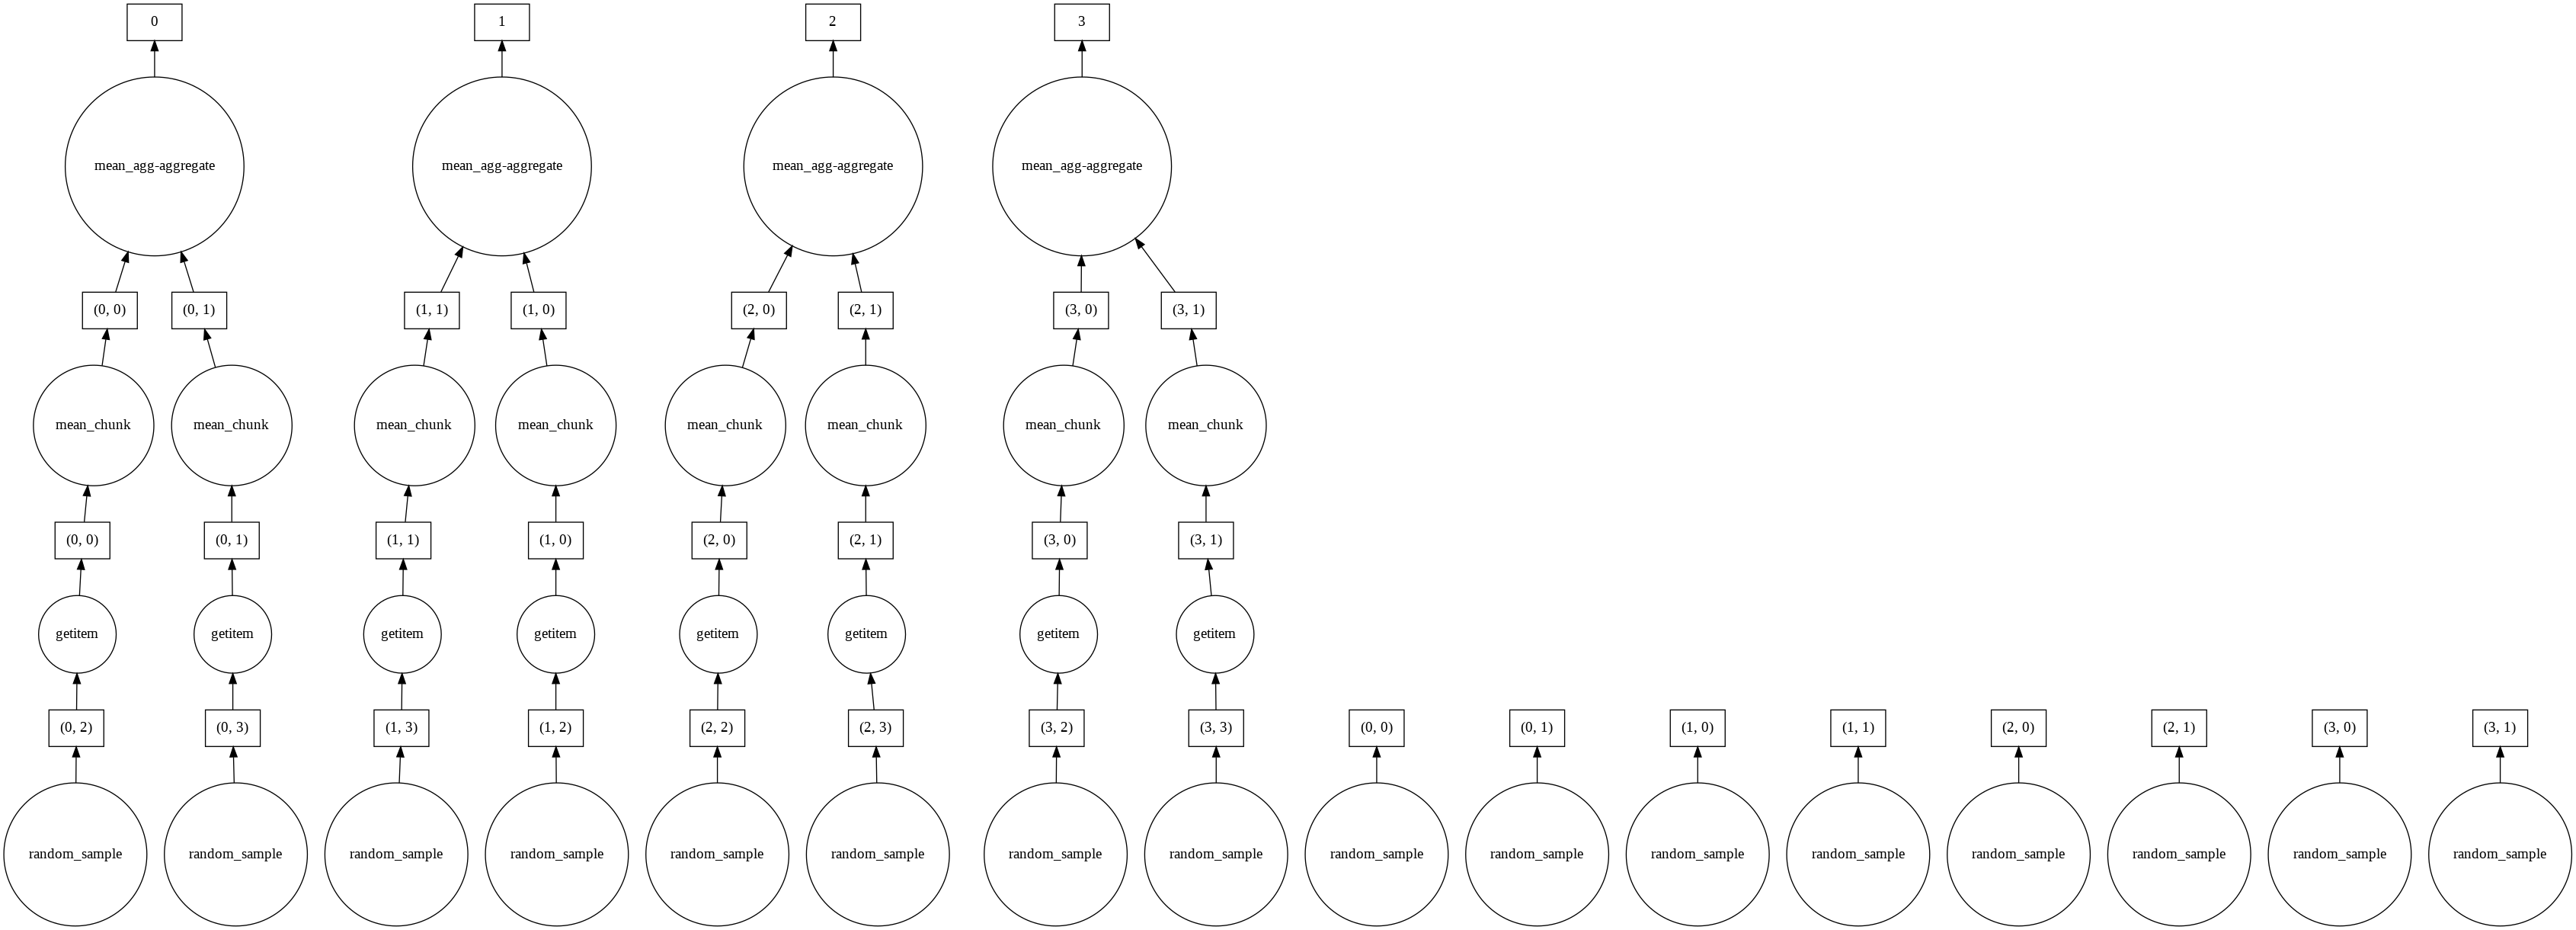

In [9]:
 x=da.random.random((10000, 10000))
z=x[::2, 5000:].mean(axis=1)
%time z.compute()
z.visualize()

In [35]:
sch=['multiprocessing', 'processes', 'single-threaded', 'sync', 'synchronous', 'threading', 'threads']

In [36]:
for i in sch:
    print(i,':')
    %time z.compute(scheduler=i)

multiprocessing :
CPU times: user 15.7 ms, sys: 12.5 ms, total: 28.3 ms
Wall time: 39.8 ms
processes :
CPU times: user 9.9 ms, sys: 16 ms, total: 25.9 ms
Wall time: 31 ms
single-threaded :
CPU times: user 0 ns, sys: 819 µs, total: 819 µs
Wall time: 840 µs
sync :
CPU times: user 446 µs, sys: 47 µs, total: 493 µs
Wall time: 492 µs
synchronous :
CPU times: user 389 µs, sys: 14 µs, total: 403 µs
Wall time: 401 µs
threading :
CPU times: user 4.18 ms, sys: 136 µs, total: 4.32 ms
Wall time: 3.59 ms
threads :
CPU times: user 2.24 ms, sys: 40 µs, total: 2.28 ms
Wall time: 2.05 ms
